## Performing PCA technique

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.info()  ## all are numerical data with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine.shape

(178, 14)

In [6]:
wine_data = wine.iloc[:,1:]
wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
## Normalizing the data
wine1 = wine_data.values
wine1_normal = scale(wine1)
wine1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [53]:
## creating PCA's
pca = PCA()
pca_values = pca.fit_transform(wine1_normal)

In [54]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [44]:
pca_values = pd.DataFrame(pca_values)
pca_values  ## 13 pca's are created

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [45]:
pca_values.var()

0     4.732437
1     2.511081
2     1.454242
3     0.924166
4     0.858049
5     0.645282
6     0.554141
7     0.350466
8     0.290512
9     0.252320
10    0.227064
11    0.169724
12    0.103962
dtype: float64

In [46]:
pca_values.var()/sum(pca_valuesdf.var())

0     0.361988
1     0.192075
2     0.111236
3     0.070690
4     0.065633
5     0.049358
6     0.042387
7     0.026807
8     0.022222
9     0.019300
10    0.017368
11    0.012982
12    0.007952
dtype: float64

In [13]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [14]:
## Cummulative variance which tells us amount of information each pca is storing
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [15]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [16]:
wts = pd.DataFrame(pca.components_)
wts.iloc[:,0]
sum(wts.iloc[:,0]**2)

1.0000000000000004

In [47]:
pca_values.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000e+00,6.375706e-16,-2.544004e-16,7.258301e-17,-1.942331e-16,-3.758083e-16,-1.636481e-17,-5.576695e-16,2.610552e-16,1.348921e-17,-4.659195e-17,-3.289433e-17,1.019441e-16
1,6.375706e-16,1.000000e+00,-1.995684e-16,1.334064e-16,1.213582e-16,-7.637715e-17,4.554653e-17,-1.778546e-16,2.643791e-17,-2.758029e-18,-6.977687e-17,-4.035382e-17,-6.629230e-17
2,-2.544004e-16,-1.995684e-16,1.000000e+00,-2.488866e-16,-2.375216e-16,2.130295e-16,-7.058793e-17,7.643896e-17,4.921605e-17,9.267569e-17,-1.225267e-16,-2.241020e-17,1.314737e-16
3,7.258301e-17,1.334064e-16,-2.488866e-16,1.000000e+00,2.944302e-16,-1.484378e-16,1.416300e-16,-2.499115e-16,-9.200121e-17,-6.543366e-17,4.655502e-17,9.245227e-17,-2.762214e-16
4,-1.942331e-16,1.213582e-16,-2.375216e-16,2.944302e-16,1.000000e+00,-2.023100e-16,-4.776120e-16,1.281079e-16,1.331695e-16,1.634507e-17,1.044465e-16,3.081846e-17,-2.509641e-16
5,-3.758083e-16,-7.637715e-17,2.130295e-16,-1.484378e-16,-2.023100e-16,1.000000e+00,3.053018e-16,1.473963e-16,3.983940e-18,7.995877e-17,-3.441177e-16,-1.236720e-16,2.821310e-16
6,-1.636481e-17,4.554653e-17,-7.058793e-17,1.416300e-16,-4.776120e-16,3.053018e-16,1.000000e+00,7.936973e-17,4.525533e-16,-1.933955e-16,3.114599e-16,1.542757e-16,-3.997023e-17
7,-5.576695e-16,-1.778546e-16,7.643896e-17,-2.499115e-16,1.281079e-16,1.473963e-16,7.936973e-17,1.000000e+00,2.255716e-16,3.717638e-16,-1.528664e-16,-1.284308e-16,2.702791e-16
8,2.610552e-16,2.643791e-17,4.921605e-17,-9.200121e-17,1.331695e-16,3.983940e-18,4.525533e-16,2.255716e-16,1.000000e+00,-1.514575e-16,-7.021313e-17,3.954683e-16,3.158098e-16
9,1.348921e-17,-2.758029e-18,9.267569e-17,-6.543366e-17,1.634507e-17,7.995877e-17,-1.933955e-16,3.717638e-16,-1.514575e-16,1.000000e+00,7.968004e-17,-2.684353e-16,-3.761446e-16


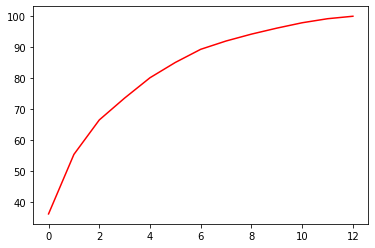

In [48]:
## Variance plot for pca companents obtained
plt.plot(var1, color='red') 

###### From the above we can see that at pca7 only we are reaching accuracy of 90% 
which means most of the data is present in pc1 to pc7

In [56]:
finaldf = pd.concat([pd.DataFrame(pca_values[:,0:7],
                                  columns =['pc1','pc2','pc3','pc4','pc5','pc6','pc7']),
                                wine[['Type']]], axis = 1)
finaldf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,1
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,3


## Performing KMeans using first 3 principal components

In [112]:
## Performing K means clustering 
from sklearn.cluster import KMeans

In [113]:
finaldf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,1


In [138]:
pca_data = finaldf.iloc[:,0:3]
pca_data

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [142]:
pca_data1 = pca_data.copy()

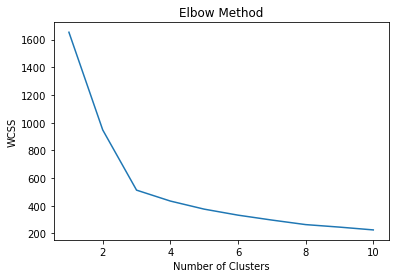

In [132]:
## Elbow graph for data with first 3 principal components
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()  

In [116]:
## Build the kmeans clustering with k = 3
from sklearn.cluster import KMeans
clusters = KMeans(3, random_state = 42)
clusters.fit(pca_data)

KMeans(n_clusters=3, random_state=42)

In [117]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [118]:
clusters.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

In [119]:
## Assign clusters to data set
pca_data['clusterid'] = clusters.labels_
pca_data.head()

,pc1,pc2,pc3,clusterid
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [120]:
pca_data.groupby('clusterid').mean().reset_index()

,clusterid,pc1,pc2,pc3
0,0,-2.720036,-1.125651,-0.239093
1,1,2.275808,-0.894518,-0.002150
2,2,-0.072720,1.777544,0.192644


## Performaing KMeans using original data set

In [104]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
## Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.iloc[:,1:])
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

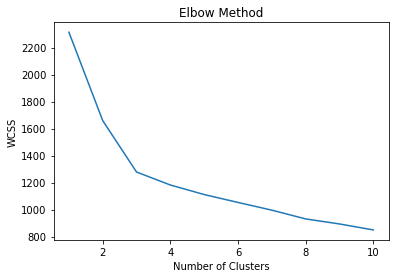

In [133]:
## Elbow graph with original data
wcss_original = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_data)
    wcss_original.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss_original)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

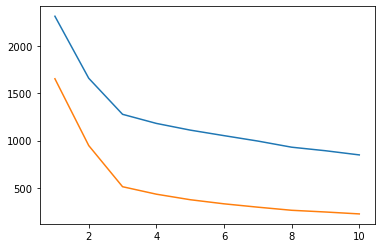

In [135]:
plt.plot(range(1,11), wcss_original)
plt.plot(range(1,11), wcss)  ## Blue line is for Original data, orange line is Pca_data

###### From above plots we can see that graph for obtaining optimal no.of clusters for k is same for both
pca data and original data

## Performing Hierarchical clustering using first 3 principal components

In [169]:
## Performing Hierarchical clustering using first 3 principal components
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [162]:
pca_data1

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


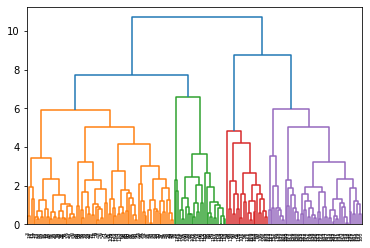

In [149]:
## Creating dendrogram
dendro = sch.dendrogram(sch.linkage(pca_data1, method = 'complete'))

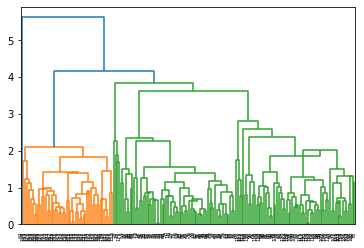

In [150]:
dendro1 = sch.dendrogram(sch.linkage(pca_data1, method = 'centroid'))

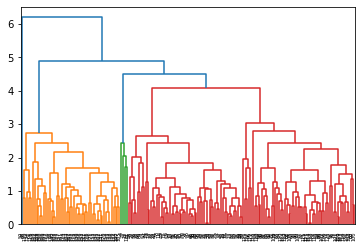

In [151]:
dendro2 = sch.dendrogram(sch.linkage(pca_data1, method = 'average'))

In [156]:
## creating clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='complete')

In [157]:
y_hc = hc.fit_predict(pca_data)
clusters_hi= pd.DataFrame(y_hc, columns = ['Clusters'])
clusters_hi

,Clusters
0,3
1,3
2,3
3,3
4,3
...,...
173,1
174,1
175,1
176,1


In [158]:
pca_data['h_clusterid']= pd.Series(y_hc)
result = pca_data.groupby(pca_data.h_clusterid).mean()
result

,pc1,pc2,pc3
h_clusterid,,,
0,-0.537558,1.512186,1.199752
1,-2.717994,-1.149057,-0.022672
2,-0.469499,1.936559,-1.164734
3,2.067696,-0.352470,-0.087632


In [166]:
hc1 = AgglomerativeClustering(n_clusters = 4, affinity='manhattan', linkage='complete')

In [167]:
y_hc = hc.fit_predict(pca_data)
clusters_hi= pd.DataFrame(y_hc, columns = ['Clusters'])
clusters_hi

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [168]:
pca_data['h_clusterid']= pd.Series(y_hc)
result1 = pca_data.groupby(pca_data.h_clusterid).mean()
result1

,pc1,pc2,pc3
h_clusterid,,,
0,-0.594196,1.473777,1.332148
1,-2.773447,-1.235936,-0.156354
2,2.067696,-0.352470,-0.087632
3,-0.469499,1.936559,-1.164734


## Performing Hierarchical clustering with original data

In [170]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [174]:
wine_hi = wine.copy()

In [177]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

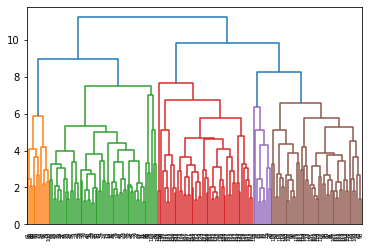

In [172]:
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))

In [173]:
hc_origianl = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')
y_hc = hc.fit_predict(scaled_data)
clusters1 = pd.DataFrame(y_hc, columns = ['clusters'])
clusters1

,clusters
0,3
1,3
2,3
3,3
4,3
...,...
173,2
174,2
175,2
176,2


In [182]:
wine_hi['h_clusterid'] = pd.Series(y_hc)
result_hi = wine_hi.iloc[:,1:].groupby(wine_hi.h_clusterid).mean()
result_hi


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
h_clusterid,,,,,,,,,,,,,,
0,12.463793,1.464138,1.997586,18.041379,96.413793,2.230000,1.965517,0.322069,1.541724,3.243793,1.109310,2.755517,536.689655,0
1,12.061667,2.239722,2.447222,21.908333,92.722222,2.321389,2.217778,0.397778,1.727500,2.873056,1.019167,2.878333,495.027778,1
2,13.102500,3.304038,2.417692,21.248077,98.980769,1.666923,0.820962,0.448462,1.158269,7.094615,0.695692,1.716923,624.846154,2
3,13.723115,1.983115,2.450656,17.267213,106.114754,2.846066,2.978361,0.285738,1.902459,5.474098,1.071967,3.148689,1099.508197,3
